In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('Sales_Transaction.csv')

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/19,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom
1,581475,12/9/19,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,United Kingdom
2,581475,12/9/19,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom
3,581475,12/9/19,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom
4,581475,12/9/19,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom


In [ ]:
primary_key = df[['TransactionNo']]

In [ ]:
primary_key.head()

,TransactionNo
0,581482
1,581475
2,581475
3,581475
4,581475


**Consider Quantity as the Target column. Identify the type of machine learning problem at hand.**

Regression. The goal would be to predict quantity sold which is a continuous variable.

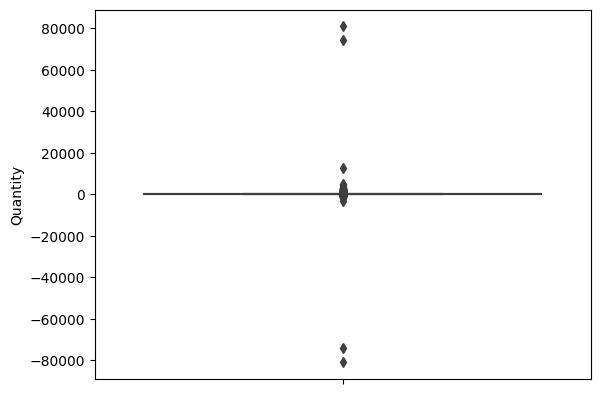

In [ ]:
# Boxplot of Quantity
sns.boxplot(y=df["Quantity"])
plt.show()

In [ ]:
df['Quantity'].describe()

count    512616.000000
mean         10.027128
std         221.078782
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

**Comment on the distribution of the Target column. Will it affect your final goal of predicting the Target column adversely? Are there outliners for this column?**

The distribution contains some outliers and will affect the predictions adversly.

In [ ]:
# Convert the 'Date' column to a pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year features from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Print the updated DataFrame
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Day,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,9,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,United Kingdom,9,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,9,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,9,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,9,12,2019


In [ ]:
# Check the correlation between 'Price' and 'Quantity'
correlation = df['Price'].corr(df['Quantity'])

# Print the correlation coefficient
print("Correlation between 'Price' and 'Quantity': ", correlation)

Correlation between 'Price' and 'Quantity':  -0.0069386309712646255


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

               Price  Quantity  CustomerNo       Day     Month      Year
Price       1.000000 -0.006939   -0.003500 -0.001121 -0.108675 -0.039411
Quantity   -0.006939  1.000000   -0.002143 -0.000639 -0.000798  0.001010
CustomerNo -0.003500 -0.002143    1.000000 -0.001534  0.022084 -0.005558
Day        -0.001121 -0.000639   -0.001534  1.000000 -0.058899 -0.014678
Month      -0.108675 -0.000798    0.022084 -0.058899  1.000000 -0.259327
Year       -0.039411  0.001010   -0.005558 -0.014678 -0.259327  1.000000


<ipython-input-31-ed094f514566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


**Comment on the correlation.**

There is a weak negative correlation indicating that as the price of the product increases, the quantity sold tends to decrease.

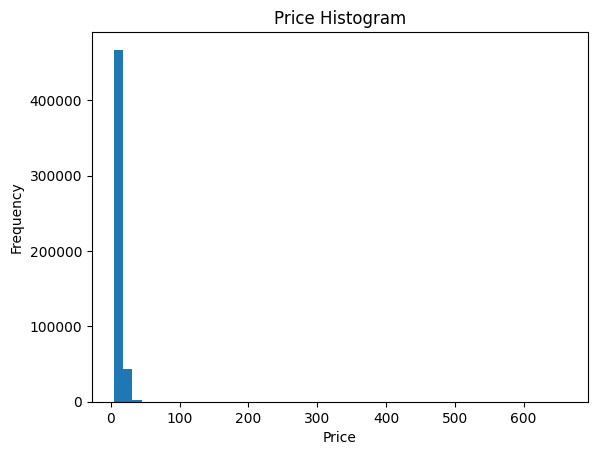

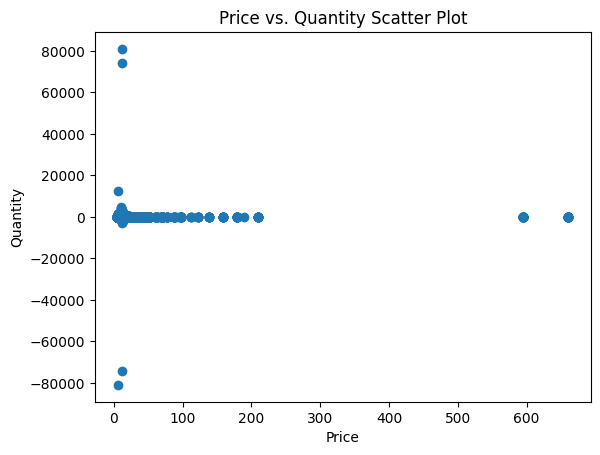

In [ ]:
# Generate histogram for 'Price'
plt.hist(df['Price'], bins=50)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between 'Price' and 'Quantity' using a scatter plot
plt.scatter(df['Price'], df['Quantity'])
plt.title('Price vs. Quantity Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

**Comment on the whether it seem Gaussian, or have severe skews and the presence of outliers on the variable, Price.**

The histogram is skewed to the right and therefore not Gaussian. The scatter plot shows a weak negative correlation between 'Price' and 'Quantity'. However, there seem to be some outliers in the data.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


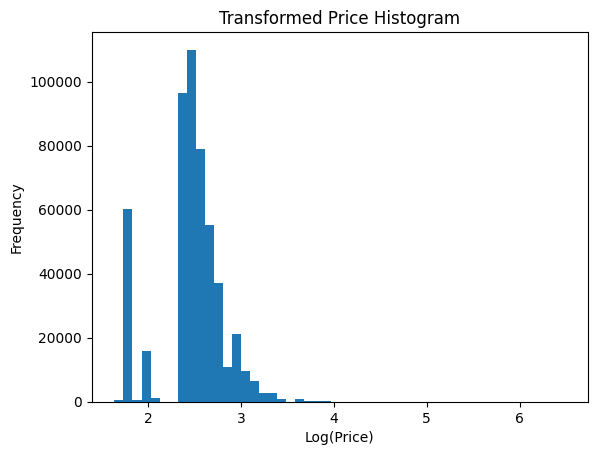

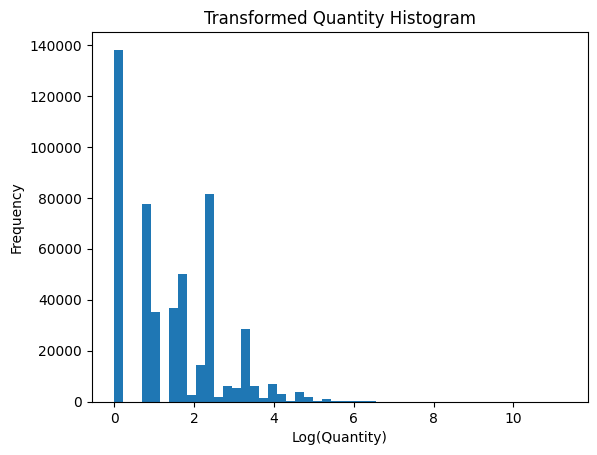

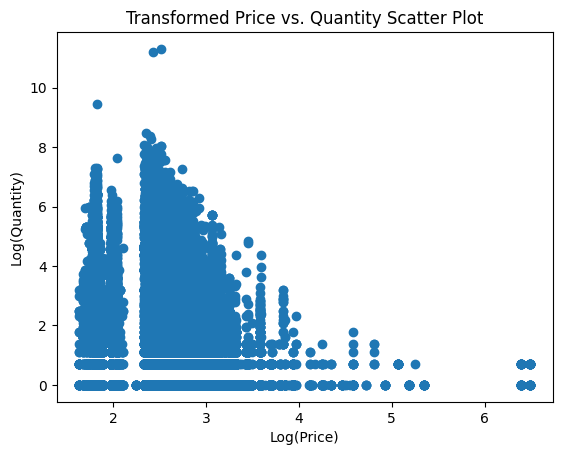

In [ ]:
# Apply log transformation to 'Price' and 'Quantity'
df['Price_log'] = np.log(df['Price'])
df['Quantity_log'] = np.log(df['Quantity'])

# Generate histograms for transformed 'Price' and 'Quantity'
plt.hist(df['Price_log'], bins=50)
plt.title('Transformed Price Histogram')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['Quantity_log'], bins=50)
plt.title('Transformed Quantity Histogram')
plt.xlabel('Log(Quantity)')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between transformed 'Price' and 'Quantity' using a scatter plot
plt.scatter(df['Price_log'], df['Quantity_log'])
plt.title('Transformed Price vs. Quantity Scatter Plot')
plt.xlabel('Log(Price)')
plt.ylabel('Log(Quantity)')
plt.show()


**Comment on the presence of outliers on each variable**

After applying a natural logarithm transformation, the data seems to have become more Gaussian.

In [ ]:
print(df['Country'].value_counts())

United Kingdom          463218
Germany                  10424
France                   10119
EIRE                      7881
Spain                     2390
Switzerland               2331
Netherlands               2329
Belgium                   1936
Portugal                  1759
Australia                 1682
Austria                    887
Norway                     791
Iceland                    756
Finland                    692
Italy                      637
Channel Islands            629
Cyprus                     582
Unspecified                447
Sweden                     417
Denmark                    397
USA                        379
Israel                     358
Japan                      354
Singapore                  215
Poland                     174
Hong Kong                  153
Canada                     150
Malta                      149
United Arab Emirates        67
Greece                      67
European Community          58
RSA                         57
Lebanon 

In [ ]:
print(df['ProductName'].value_counts())

Cream Hanging Heart T-Light Holder    2253
Regency Cakestand 3 Tier              2097
Jumbo Bag Red Retrospot               2085
Party Bunting                         1702
Lunch Bag Red Retrospot               1584
                                      ... 
Purple Anemone Artificial Flower         1
Happy Birthday Card Teddy/Cake           1
Pearl & Shell 42"Neckl Ivory             1
Green Pop Art Mao Cushion Cover          1
Gold Cosmetic Bag Pink Star              1
Name: ProductName, Length: 3726, dtype: int64


**Discuss whether each of them is ordinal or nominal.**

Both Country and Product Name are nominal, meaning no specific order. However, there are some rare values in Product Name.

In [ ]:
# Count the number of characters in each product name
df['Product_Name_Length'] = df['ProductName'].str.len()

# Count the number of words in each product name
df['Product_Name_Word_Count'] = df['ProductName'].str.split().str.len()

In [ ]:
print(df.isna().sum())

TransactionNo                 0
Date                          0
ProductNo                     0
ProductName                   1
Price                         1
Quantity                      1
CustomerNo                   56
Country                       1
Day                           0
Month                         0
Year                          0
Price_log                     1
Quantity_log               8225
Product_Name_Length           1
Product_Name_Word_Count       1
dtype: int64


In [ ]:
df = df.dropna()

**State in your notebook how you dealt with the NaN values with a justification backing the approach taken to deal with NaNs**

There were two columns with a lot of NaNs: Quanity_log and CustomerNo. The NaNs in both of these columns were dropped.

The NaNs in Quantity_log is due to taking a log of a negative number. There were negative numbers in the Quantity column which do not make sense and could be an error since a customer cannot purchase a negative amount.

The NaNs in CustomerNo were dropped because if we are not able to attribute a customer to a specific sale, the sale cannot be valid. It could be an error since there needs to be a customer for every sale.

In [ ]:
df.dtypes

TransactionNo                      object
Date                       datetime64[ns]
ProductNo                          object
ProductName                        object
Price                             float64
Quantity                          float64
CustomerNo                        float64
Country                            object
Day                                 int64
Month                               int64
Year                                int64
Price_log                         float64
Quantity_log                      float64
Product_Name_Length               float64
Product_Name_Word_Count           float64
dtype: object

In [ ]:
import re

# Extract the numeric part of the ProductNo column and convert it to a numeric feature
df['ProductNo'] = df['ProductNo'].apply(lambda x: re.findall('\d+', str(x))[0]).astype('int64')

In [ ]:
# Since country is a string it should be converted so it can be put into the model
df = pd.get_dummies(df, columns=['Country'], prefix='Country')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = df.drop(['Quantity', 'Date', 'TransactionNo', 'ProductName'], axis=1)
y = df['Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('Random Forest Regression RMSE:', rmse_rf)

# Running Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('Gradient Boosting Regression RMSE:', rmse_gb)

Random Forest Regression RMSE: 113.28202486100959
Gradient Boosting Regression RMSE: 23.1191811352791


I tested a random forest and gradient boosting model since the relationship between the predictors and target variable is nonlinear and these models are better at catching more complex interactions between the predictors. This eliminates options such as a linear regression.

The Gradient Boosting Regression performed the best with the lowest RMSE, meaning on average, the predicted quantity values are off by about ~23 units from the actual quantity values.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb_reg = GradientBoostingRegressor(random_state=42)
gb_params = {'n_estimators': [50, 100, 150, 200],
             'learning_rate': [0.001, 0.01, 0.1, 1],
             'max_depth': [5, 10, 15, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
gb_random = RandomizedSearchCV(estimator=gb_reg, param_distributions=gb_params, cv=5, n_iter=50, n_jobs=-1, random_state=42)
gb_random.fit(X_train, y_train)
print('Gradient Boosting Regression Best Parameters:', gb_random.best_params_)
y_pred_gb = gb_random.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('Gradient Boosting Regression RMSE:', rmse_gb)